In [16]:
import os
from dotenv import load_dotenv
load_dotenv()

GEMINI_API_KEY = os.getenv( "GEMINI_API_KEY")
if not GEMINI_API_KEY:
    raise valueError("GEMINI_API_KEY is not set in the .env file please write api key and proceed further")
print("GEMINI_API_KEY is loaded successfully")
    

GEMINI_API_KEY is loaded successfully


In [19]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings,ChatGoogleGenerativeAI 
from langchain_core.messages import HumanMessage, AIMessage

faq_data = [
    {'question': "How do I track my order?", 'answer': "You can track your order by logging into your account and going to the 'Order History' section."},
    {'question': "What is your return policy?", 'answer': "Our return policy allows returns within 30 days of purchase."},
    {"question": "Can I cancel or modify my order after placing it?","answer": "Yes, you can cancel or modify your order within 24 hours of placing it by contacting our customer support team."},
    {"question": "What should I do if I receive a damaged or incorrect item?", "answer": "If you receive a damaged or incorrect item, please contact our support team immediately with your order details and a photo of the item."},
    {"question": "Do you offer discounts or promotional codes?","answer": "Yes, we regularly offer discounts and promotional codes. Sign up for our newsletter or follow us on social media to stay updated."},
    {"question": "How long does delivery take?",  "answer": "Delivery typically takes 3-7 business days for domestic orders and 7-14 business days for international orders."},
    {"question": "Is my personal information secure?", "answer": "Yes, we use industry-standard encryption and security measures to protect your personal information and ensure safe transactions."}
]


gemini_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001" ,google_api_key=GEMINI_API_KEY)
def faq_data_with_embeddings(faq_data):
    for faq in faq_data:
        faq['embedding'] = gemini_embeddings.embed_query(faq['question'])
    return faq_data


enriched_faq_data = faq_data_with_embeddings(faq_data) 

In [ ]:
enriched_faq_data

In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0 )

In [18]:
result  = llm.invoke("hi")
result

AIMessage(content='Hi there! How can I help you today?\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-e8b6b82f-dbfd-4c89-865b-cabacfa1198a-0', usage_metadata={'input_tokens': 2, 'output_tokens': 11, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

In [27]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import MessagesState
class State(MessagesState):
    summary: str
    
def categorize_query(query, retriever, tool_keywords): 
    faq_result = retriever.get_relevant_documents(query)
    if faq_result and faq_result[0]['score'] > 0.75:
        return "RAG", faq_result[0]['content']
     
    for keyword in tool_keywords:
        if keyword in query.lower():
            return "Tool Call", keyword
     
    return "General", None
    
def first_node(state: MessagesState):
    query = state['messages']
    return   categorize_query(query, retriever, tool_keywords)

builder: StateGraph = StateGraph(MessagesState)
builder.add_node("first_node", first_node) 

builder.add_edge(START, "first_node")
builder.add_edge("first_node",END)
graph: CompiledStateGraph = builder.compile( )

In [28]:
messages = graph.invoke({"messages": 'hi'})
for m in messages['messages']:
    m.pretty_print()


NameError: name 'retriever' is not defined

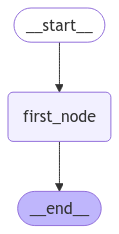

In [24]:
  
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png())) 